In [1]:
from sklearn.model_selection import train_test_split
# 交叉验证
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import svm
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
import pandas as pd
from prettytable import PrettyTable
# 绘图时显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = pd.read_table('iris.data', header = None, sep = ',')
iris.columns =['sepal length','sepal width','petal length','petal width','class'] 
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
data = iris.copy()
class_map = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
data['class'] = data['class'].map(class_map) # 将类别转换为0，1，2
print(data.shape)
data.sample(frac=1).head(5)

(150, 5)


,sepal length,sepal width,petal length,petal width,class
138,6.0,3.0,4.8,1.8,2
109,7.2,3.6,6.1,2.5,2
136,6.3,3.4,5.6,2.4,2
102,7.1,3.0,5.9,2.1,2
132,6.4,2.8,5.6,2.2,2


In [56]:
x = data.iloc[:,0:4].values
y = data.iloc[:,4].values # x为前四列，y为第五列，x为训练数据，y为数据标签
print(x.shape,y.shape)
# x_train,x_test,y_train,y_test = 训练数据，测试数据，训练数据标签，测试数据标签
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2024,test_size=0.2)  # 数据集划分成80%训练集和20%测试集
print(x_train.shape,x_test.shape)

(150, 4) (150,)
(120, 4) (30, 4)


#### 1. SVM分类

In [12]:
# 初始参数
c = 1 #误差项惩罚系数
k = 'linear' # 线性核

# 定义分类器
clf_SVM = svm.SVC(C=c, kernel=k)              
# 5折交叉验证
cv = KFold(n_splits=5, shuffle=True, random_state=2024)
result_SVM = cross_validate(clf_SVM, x_train, y_train, cv=cv, return_train_score=True)

print( f'train_score mean:{result_SVM["train_score"].mean():.4f}')
print( f'val_score mean:{result_SVM["test_score"].mean():.4f}')  
print( f'fit_time mean:{result_SVM["fit_time"].mean():.4f}')  

train_score mean:0.9875
val_score mean:0.9583
fit_time mean:0.0015


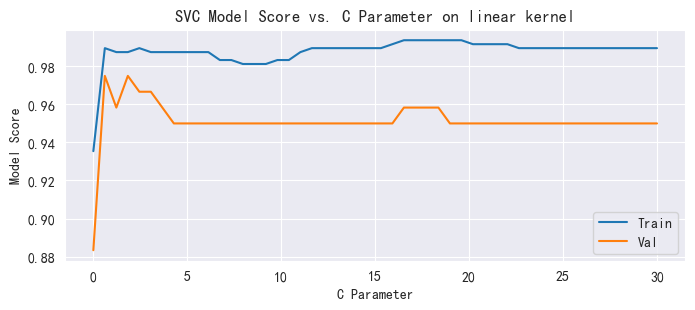

Best Val Score: 0.9750 at C = 0.62
Train score: 0.9896
Fit time: 0.0017


In [19]:
# 对C调参 固定kernel为linear
score_val = []
score_train = []
fit_time = []
C_range = np.linspace(0.01,30,50) # 0.01到30共50个取值
for i in C_range:
    clf_SVM = svm.SVC(C=i, kernel=k)
    result_SVM = cross_validate(clf_SVM, x_train, y_train, cv=cv, return_train_score=True)
    score_train.append(result_SVM["train_score"].mean())
    score_val.append(result_SVM["test_score"].mean())
    fit_time.append(result_SVM["fit_time"].mean())
best_score = max(score_val)
best_C = C_range[score_val.index(best_score)]

# 绘制C参数与模型得分关系图
plt.figure(figsize=(8, 3))
plt.plot(C_range, score_train, label = 'Train')
plt.plot(C_range, score_val, label = 'Val')
plt.title('SVC Model Score vs. C Parameter on linear kernel')
plt.xlabel('C Parameter')
plt.legend()
plt.ylabel('Model Score')
plt.show()
print(f'Best Val Score: {best_score:.4f} at C = {best_C:.2f}')
print(f'Train score: {score_train[score_val.index(best_score)]:.4f}')
print(f'Fit time: {fit_time[score_val.index(best_score)]:.4f}')

In [28]:
# linear核下最优模型test预测
clf = svm.SVC(C=best_C, kernel='linear').fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.78      0.88      0.82         8
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.89      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



In [18]:
# 切换核为高斯核
c = 1
k = 'rbf'

# 定义分类器
clf_SVM = svm.SVC(C=c, kernel=k)
# 5折交叉验证
cv = KFold(n_splits=5, shuffle=True, random_state=2024)
result_SVM = cross_validate(clf_SVM, x_train, y_train, cv=cv, return_train_score=True)

print( f'train_score mean:{result_SVM["train_score"].mean():.4f}')
print( f'val_score mean:{result_SVM["test_score"].mean():.4f}')  
print( f'fit_time mean:{result_SVM["fit_time"].mean():.4f}')

train_score mean:0.9854
val_score mean:0.9750
fit_time mean:0.0043


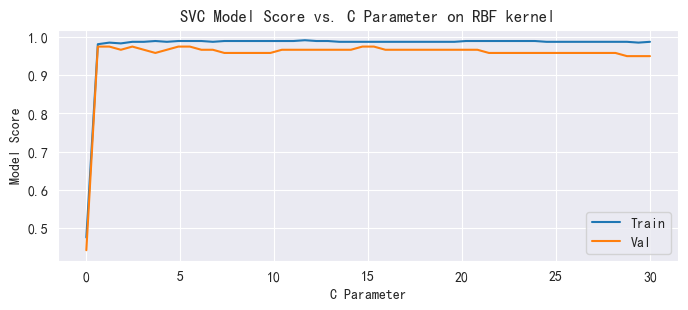

Best Val Score: 0.9750 at C = 0.62
Train score: 0.9812
Fit time: 0.0016


In [20]:
# 对C调参 固定kernel为rbf
score_val = []
score_train = []
fit_time = []
C_range = np.linspace(0.01,30,50) # 0.01到30共50个取值
for i in C_range:
    clf_SVM = svm.SVC(C=i, kernel='rbf')
    result_SVM = cross_validate(clf_SVM, x_train, y_train, cv=cv, return_train_score=True)
    score_train.append(result_SVM["train_score"].mean())
    score_val.append(result_SVM["test_score"].mean())
    fit_time.append(result_SVM["fit_time"].mean())
best_score = max(score_val)
best_C = C_range[score_val.index(best_score)]

# 绘制C参数与模型得分关系图
plt.figure(figsize=(8, 3))
plt.plot(C_range, score_train, label = 'Train')
plt.plot(C_range, score_val, label = 'Val')
plt.title('SVC Model Score vs. C Parameter on RBF kernel')
plt.xlabel('C Parameter')
plt.legend()
plt.ylabel('Model Score')
plt.show()
print(f'Best Val Score: {best_score:.4f} at C = {best_C:.2f}')
print(f'Train score: {score_train[score_val.index(best_score)]:.4f}')
print(f'Fit time: {fit_time[score_val.index(best_score)]:.4f}')

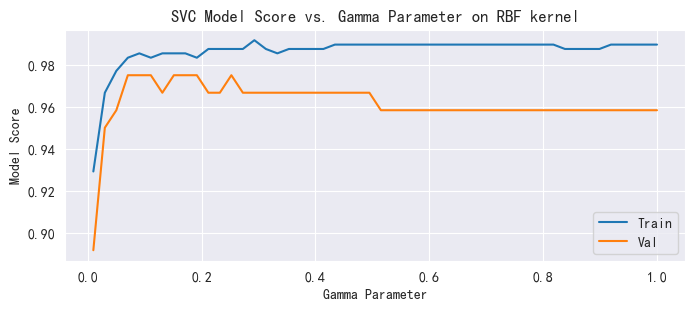

Best Val Score: 0.9750 at Gamma = 0.07
Train score: 0.9833
Fit time: 0.0014


In [29]:
# 对gamma调参 固定kernel为rbf
score_val = []
score_train = []
fit_time = []
g_range = np.linspace(0.01,1,50) # 0.01到共50个取值
for i in g_range:
    clf_SVM = svm.SVC(C=best_C, kernel='rbf', gamma=i) # C取最优值
    result_SVM = cross_validate(clf_SVM, x_train, y_train, cv=cv, return_train_score=True)
    score_train.append(result_SVM["train_score"].mean())
    score_val.append(result_SVM["test_score"].mean())
    fit_time.append(result_SVM["fit_time"].mean())
best_score = max(score_val)
best_g = g_range[score_val.index(best_score)]

# 绘制C参数与模型得分关系图
plt.figure(figsize=(8, 3))
plt.plot(g_range, score_train, label = 'Train')
plt.plot(g_range, score_val, label = 'Val')
plt.title('SVC Model Score vs. Gamma Parameter on RBF kernel')
plt.xlabel('Gamma Parameter')
plt.legend()
plt.ylabel('Model Score')
plt.show()
print(f'Best Val Score: {best_score:.4f} at Gamma = {best_g:.2f}')
print(f'Train score: {score_train[score_val.index(best_score)]:.4f}')
print(f'Fit time: {fit_time[score_val.index(best_score)]:.4f}')

In [30]:
# rbf核下最优模型test预测
clf = svm.SVC(C=best_C, kernel='rbf', gamma=best_g).fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.70      0.88      0.78         8
           2       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.85        30
weighted avg       0.88      0.87      0.87        30



#### 2. 神经网络分类

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import time

In [136]:
class MultiLayerDNN(nn.Module):

    def __init__(self, input_size, hidden_sizes, output_size):
        """
        初始化多隐藏层的深度神经网络
        参数:
            input_size (int): 输入特征的数量
            hidden_sizes (list): 包含每个隐藏层神经元数量的列表
            output_size (int): 输出的类别数量
        """
        super(MultiLayerDNN, self).__init__()

        # 定义第一个隐藏层
        self.hidden_layers = nn.ModuleList([
            nn.Linear(input_size, hidden_sizes[0]),
            nn.ReLU()
        ])

        # 定义更多的隐藏层
        for i in range(1, len(hidden_sizes)):
            self.hidden_layers.extend([
                nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]),
                nn.ReLU()  # 可以使用其他激活函数，如nn.Sigmoid(), nn.Tanh()
            ])

        # 定义输出层
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)
    
    def forward(self, x):
        """
        定义前向传播的过程
        参数:
        x (torch.Tensor): 输入数据
        返回:
            torch.Tensor: 模型的输出
        """
        # 遍历隐藏层并应用线性变换和激活函数
        for layer in self.hidden_layers:
            x = layer(x)

        # 应用输出层的线性变换
        x = self.output_layer(x)

        # 在最后一层输出上应用softmax
        x = F.softmax(x, dim=1)

        return x

In [158]:
# 定义输入、隐藏层和输出的维度
input_size = 4
hidden_sizes = [16]
output_size = 3

In [159]:
# 创建模型实例、损失函数和优化器
device = torch.device("cpu")
model = MultiLayerDNN(input_size, hidden_sizes, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer,milestones=np.arange(2,100,2),gamma=0.9)
 
# 打印模型结构
print(model)

MultiLayerDNN(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=4, out_features=16, bias=True)
    (1): ReLU()
  )
  (output_layer): Linear(in_features=16, out_features=3, bias=True)
)


In [57]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,random_state=2024,test_size=0.2)
input_data = torch.tensor(x_train).float()
target_labels = torch.tensor(y_train).long()
val_data = torch.tensor(x_val).float()
val_labels = torch.tensor(y_val).long()
test_data = torch.tensor(x_test).float()
test_labels = torch.tensor(y_test).long()
# 将数据包装成TensorDataset
train = TensorDataset(input_data, target_labels)
test = TensorDataset(test_data, test_labels)
val = TensorDataset(val_data, val_labels)
# 定义 DataLoader 加载数据
batch_size = 16
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test, shuffle=False)
val_loader = DataLoader(val, shuffle=False)

In [48]:
def train_runner(model, device, trainloader, optimizer, epoch):
    #训练模型, 启用 BatchNormalization 和 Dropout, 将BatchNormalization和Dropout置为True
    model.train()
    total = 0
    correct =0.0

    #enumerate迭代已加载的数据集,同时获取数据和数据下标
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        #把模型部署到device上
        inputs, labels = inputs.to(device), labels.to(device)
        #初始化梯度
        optimizer.zero_grad()
        #保存训练结果
        outputs = model(inputs)
        #计算损失和
        loss = criterion(outputs, labels)
        #获取最大概率的预测结果
        #dim=1表示返回每一行的最大值对应的列下标
        predict = outputs.argmax(dim=1)
        total += labels.size(0)
        correct += (predict == labels).sum().item()
        #反向传播
        loss.backward()
        #更新参数
        optimizer.step()
        if i % 100 == 0:
            #loss.item()表示当前loss的数值
            print("Train Epoch{} \n \t Loss: {:.6f}, accuracy: {:.6f}%".format(epoch, loss.item(), 100*(correct/total)))
    return loss.item(), correct/total

In [49]:
def val_runner(model, device, valloader):
    #模型验证, 必须要写, 否则只要有输入数据, 即使不训练, 它也会改变权值
    #因为调用eval()将不启用 BatchNormalization 和 Dropout, BatchNormalization和Dropout置为False
    model.eval()
    #统计模型正确率, 设置初始值
    correct = 0.0
    val_loss = 0.0
    total = 0
    #torch.no_grad将不会计算梯度, 也不会进行反向传播
    with torch.no_grad():
        for data, label in valloader:
            data, label = data.to(device), label.to(device)
            output = model(data)
            val_loss += criterion(output, label).item()
            predict = output.argmax(dim=1)
            #计算正确数量
            total += label.size(0)
            correct += (predict == label).sum().item()
        #计算损失值
        print("\t val_avarage_loss: {:.6f}, accuracy: {:.6f}%".format(val_loss/total, 100*(correct/total)))
    return val_loss/total, correct/total

In [161]:
#调用
epoch = 40
Loss_train = []
Accuracy_train = []
Loss_test = []
Accuracy_test = []
time1 = time.time()
for epoch in range(1, epoch+1):
    loss_t, acc_t = train_runner(model, device, train_loader, optimizer, epoch)
    Loss_train.append(loss_t)
    Accuracy_train.append(acc_t)
    scheduler.step()
    loss_v, acc_v = val_runner(model, device, val_loader)
    Loss_test.append(loss_v)
    Accuracy_test.append(acc_v)
print("cost_time: ",time.time()-time1,'\n')
print('Finished Training') 

Train Epoch1 
 	 Loss: 1.068990, accuracy: 68.750000%
	 val_avarage_loss: 1.049170, accuracy: 33.333333%
Train Epoch2 
 	 Loss: 1.078136, accuracy: 31.250000%
	 val_avarage_loss: 1.007242, accuracy: 70.833333%
Train Epoch3 
 	 Loss: 0.995830, accuracy: 68.750000%
	 val_avarage_loss: 0.975224, accuracy: 70.833333%
Train Epoch4 
 	 Loss: 1.006494, accuracy: 56.250000%
	 val_avarage_loss: 0.937882, accuracy: 70.833333%
Train Epoch5 
 	 Loss: 0.992436, accuracy: 50.000000%
	 val_avarage_loss: 0.903255, accuracy: 70.833333%
Train Epoch6 
 	 Loss: 0.951466, accuracy: 62.500000%
	 val_avarage_loss: 0.870389, accuracy: 70.833333%
Train Epoch7 
 	 Loss: 0.904188, accuracy: 68.750000%
	 val_avarage_loss: 0.847637, accuracy: 70.833333%
Train Epoch8 
 	 Loss: 0.869215, accuracy: 68.750000%
	 val_avarage_loss: 0.824142, accuracy: 70.833333%
Train Epoch9 
 	 Loss: 0.919709, accuracy: 56.250000%
	 val_avarage_loss: 0.805966, accuracy: 75.000000%
Train Epoch10 
 	 Loss: 0.856566, accuracy: 68.750000%


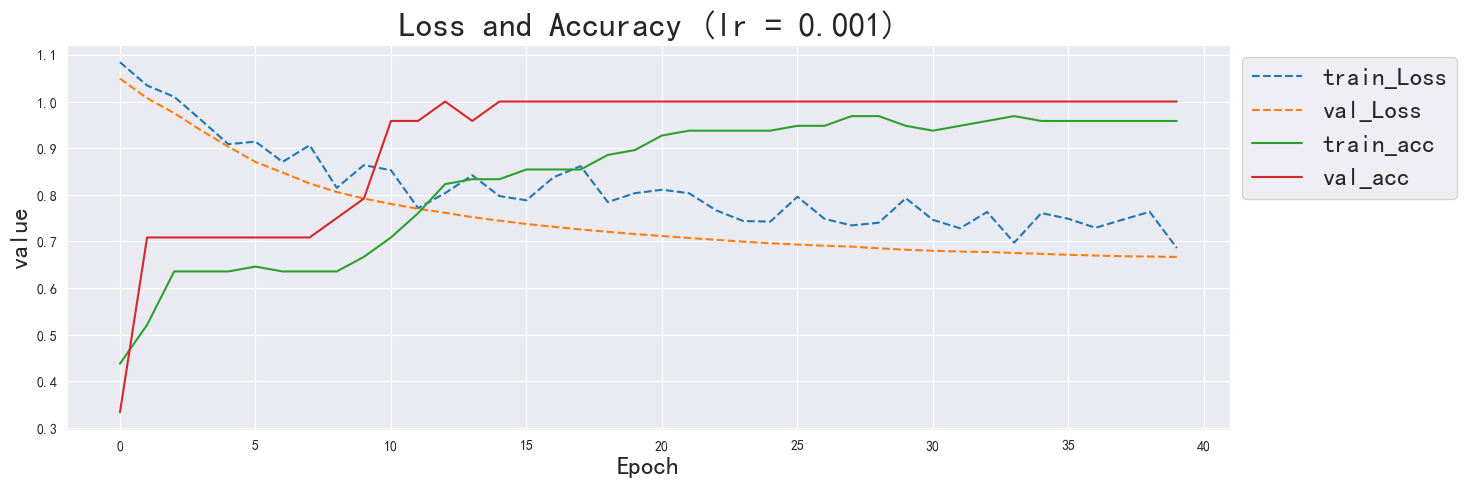

In [162]:
plt.figure(figsize=(15,5))
plt.plot(Loss_train, '--', label = 'train_Loss')
plt.plot(Loss_test, '--', label = 'val_Loss')
plt.plot(Accuracy_train,label = 'train_acc')
plt.plot(Accuracy_test, label = 'val_acc')
plt.title('Loss and Accuracy (lr = 0.001)', size=24)
plt.xlabel('Epoch', size=18)
plt.ylabel('value', size=18)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', fontsize=18)
#plt.tight_layout()
plt.show() #ModelB2结果可视化

In [164]:
torch.save(model, './model.pth')
model = torch.load('./model.pth') #加载模型
print(model)

MultiLayerDNN(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=4, out_features=16, bias=True)
    (1): ReLU()
  )
  (output_layer): Linear(in_features=16, out_features=3, bias=True)
)


In [163]:
#模型预测
model = model.to(device)
model.eval()    #把模型转为test模式
y_pred=np.zeros(30)
i = 0
for data, label in test_loader:
    data, label = data.to(device), label.to(device)
    output = model(data)
    y_pred[i]=(output.argmax(dim=1))
    i += 1

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



#### 3. 集成算法
##### 3.1 bagging

In [36]:
n = 100 #也就是最大的弱学习器的个数。一般来说n_estimators太小，容易欠拟合，n_estimators太大，计算量会太大，并且n_estimators到一定的数量后，再增大n_estimators获得的模型提升会很小，所以一般选择一个适中的数值。默认是100。
# 决策树 bagging策略模型
clf_bgg = BaggingClassifier(DecisionTreeClassifier(max_depth=d),n_estimators=n, max_samples=50, bootstrap=True, random_state=2024)

result_bgg = cross_validate(clf_bgg, x_train, y_train, cv=cv, return_train_score=True)

print( f'train_score mean:{result_bgg["train_score"].mean():.4f}')
print( f'val_score mean:{result_bgg["test_score"].mean():.4f}')  
print( f'fit_time mean:{result_bgg["fit_time"].mean():.4f}')

train_score mean:0.9854
val_score mean:0.9667
fit_time mean:0.3173


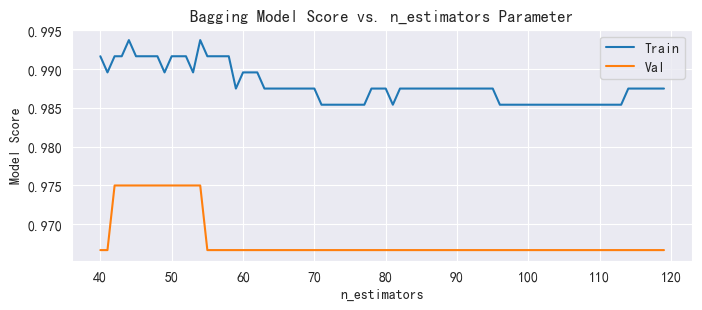

Best Val Score: 0.9750 at n_estimators = 42.00
Train score: 0.9917
Fit time: 0.1415


In [48]:
#调整n_estimators
score_val = []
score_train = []
fit_time = []
n_range = list(range(40,120))
for i in n_range:
    clf_bgg = BaggingClassifier(n_estimators=i, max_samples=50, bootstrap=True, random_state=2024)
    result_bgg = cross_validate(clf_bgg, x_train, y_train, cv=cv, return_train_score=True)
    score_train.append(result_bgg["train_score"].mean())
    score_val.append(result_bgg["test_score"].mean())
    fit_time.append(result_bgg["fit_time"].mean())
best_score = max(score_val)
best_n = n_range[score_val.index(best_score)]

# 绘制C参数与模型得分关系图
plt.figure(figsize=(8, 3))
plt.plot(n_range, score_train, label = 'Train')
plt.plot(n_range, score_val, label = 'Val')
plt.title('Bagging Model Score vs. n_estimators Parameter')
plt.xlabel('n_estimators')
plt.legend()
plt.ylabel('Model Score')
plt.show()
print(f'Best Val Score: {best_score:.4f} at n_estimators = {best_n:.2f}')
print(f'Train score: {score_train[score_val.index(best_score)]:.4f}')
print(f'Fit time: {fit_time[score_val.index(best_score)]:.4f}')  # n_estimator = 42

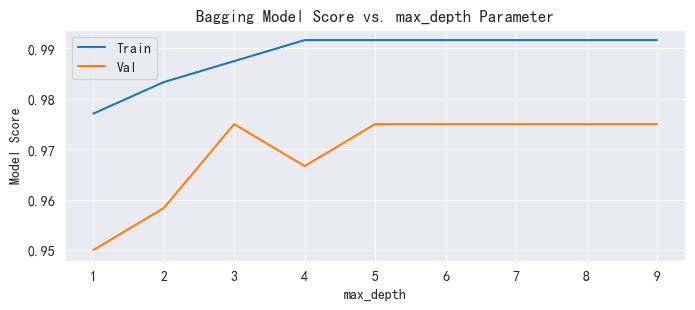

Best Val Score: 0.9750 at max_depth = 3.00
Train score: 0.9875
Fit time: 0.1424


In [51]:
#调整max_depth
score_val = []
score_train = []
fit_time = []
d_range = list(range(1,10))
for i in d_range:
    clf_bgg = BaggingClassifier(DecisionTreeClassifier(max_depth=i), n_estimators=42, max_samples=50, bootstrap=True, random_state=2024)
    result_bgg = cross_validate(clf_bgg, x_train, y_train, cv=cv, return_train_score=True)
    score_train.append(result_bgg["train_score"].mean())
    score_val.append(result_bgg["test_score"].mean())
    fit_time.append(result_bgg["fit_time"].mean())
best_score = max(score_val)
best_d = d_range[score_val.index(best_score)]

# 绘制C参数与模型得分关系图
plt.figure(figsize=(8, 3))
plt.plot(d_range, score_train, label = 'Train')
plt.plot(d_range, score_val, label = 'Val')
plt.title('Bagging Model Score vs. max_depth Parameter')
plt.xlabel('max_depth')
plt.legend()
plt.ylabel('Model Score')
plt.show()
print(f'Best Val Score: {best_score:.4f} at max_depth = {best_d:.2f}')
print(f'Train score: {score_train[score_val.index(best_score)]:.4f}')
print(f'Fit time: {fit_time[score_val.index(best_score)]:.4f}')  # max_depth=5

In [142]:
# 最优模型test预测
clf = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=42, max_samples=50, bootstrap=True, random_state=2024).fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.78      0.88      0.82         8
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.89      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



#### 3.2 随机森林

In [59]:
# 创建随机森林分类器 初始
clf_RF = RandomForestClassifier(bootstrap=True, random_state=2024)
# 交叉验证
result_RF = cross_validate(clf_RF, x_train, y_train, cv=cv, return_train_score=True)

print( f'train_score mean:{result_RF["train_score"].mean():.4f}')
print( f'val_score mean:{result_RF["test_score"].mean():.4f}')  
print( f'fit_time mean:{result_RF["fit_time"].mean():.4f}')

train_score mean:1.0000
val_score mean:0.9750
fit_time mean:0.2893


In [78]:
n = 42
d = 5 # 根据bagging
f = 'sqrt' #默认值
# 创建随机森林分类器
clf_RF = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f, bootstrap=True, random_state=2024)
# 交叉验证
result_RF = cross_validate(clf_RF, x_train, y_train, cv=cv, return_train_score=True)

print( f'train_score mean:{result_RF["train_score"].mean():.4f}')
print( f'val_score mean:{result_RF["test_score"].mean():.4f}')  
print( f'fit_time mean:{result_RF["fit_time"].mean():.4f}')  

train_score mean:0.9979
val_score mean:0.9833
fit_time mean:0.1255


In [80]:
n = 42
d = 5 # 根据bagging
f = 'log2' 
# 创建随机森林分类器
clf_RF = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f, bootstrap=True, random_state=2024)
# 交叉验证
result_RF = cross_validate(clf_RF, x_train, y_train, cv=cv, return_train_score=True)

print( f'train_score mean:{result_RF["train_score"].mean():.4f}')
print( f'val_score mean:{result_RF["test_score"].mean():.4f}')  
print( f'fit_time mean:{result_RF["fit_time"].mean():.4f}')  # 无明显区别,f回归默认

train_score mean:0.9979
val_score mean:0.9833
fit_time mean:0.1210


In [81]:
# 最优模型test预测
clf = RandomForestClassifier(n_estimators=42, max_depth=5, max_features='sqrt', bootstrap=True, random_state=2024).fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.78      0.88      0.82         8
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.89      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



#### 3.3 Adaboost

In [90]:
# 调参
d = 5
n = 100
lr = 1.0 #指各弱分类器的权重系数，默认为1.

In [91]:
# 基学习器
base_learner = DecisionTreeClassifier(max_depth = d, random_state = 2024)
# 该参数指基分类器权重的计算方式，默认为SAMME.R，表示用样本分类的概率来作为基分类器的权重；还可以选择SAMME，则使用训练集的误差来作为权重。
# 定义样本权重为SAMME.R算法的AdaBoost分类器
Ada_real = AdaBoostClassifier(
                         estimator = base_learner,  # 选定基分类器
                         algorithm = "SAMME.R",  # 选定样本权重设置算法为SAMME.R，这也是默认值
                         n_estimators = n,     # 最大弱学习器个数
                         learning_rate = lr,     # 学习率
                         random_state = 2024
                         )

# 定义样本权重为SAMME算法的AdaBoost分类器
Ada_dis = AdaBoostClassifier(
                         estimator = base_learner,  # 选定基分类器
                         algorithm = "SAMME",    # 选定样本权重设置算法为SAMME
                         n_estimators = n,     # 最大弱学习器个数
                         learning_rate = lr,     # 学习率
                         random_state = 2024
                         )

# 训练模型交叉验证
result_real = cross_validate(Ada_real, x_train, y_train, cv=cv, return_train_score=True)
result_dis = cross_validate(Ada_dis, x_train, y_train, cv=cv, return_train_score=True)

# 创建表格对象
table = PrettyTable()
# 定义表格列名和数据
table.field_names = ["算法", "训练集得分", "验证集得分","运行时间"]
table.add_row([ "SAMME.R", 
               "{:.4f}".format(result_real["train_score"].mean()), 
               "{:.4f}".format(result_real["test_score"].mean()),
               "{:.4f}".format(result_real["fit_time"].mean())])
table.add_row([ "SAMME", 
               "{:.4f}".format(result_dis["train_score"].mean()),
               "{:.4f}".format(result_dis["test_score"].mean()),
               "{:.4f}".format(result_dis["fit_time"].mean())])

# 打印表格
table  # SAMME较好

算法,训练集得分,验证集得分,运行时间
SAMME.R,1.0000,0.9667,0.0096
SAMME,0.9979,0.9750,0.0065


In [92]:
#调整lr
def Ada_nadjust(n):
    score_val = []
    score_train = []
    fit_time = []
    lr_range = np.linspace(0.1,3,50)
    for i in lr_range:
        clf_Ada = AdaBoostClassifier(estimator=base_learner, algorithm="SAMME", n_estimators=n, 
                                  learning_rate=i, random_state=2024)
        result_Ada = cross_validate(clf_Ada, x_train, y_train, cv=cv, return_train_score=True)
        score_train.append(result_Ada["train_score"].mean())
        score_val.append(result_Ada["test_score"].mean())
        fit_time.append(result_Ada["fit_time"].mean())
    best_score = max(score_val)
    best_lr = lr_range[score_val.index(best_score)]
    return score_val, score_train, fit_time, best_score, best_lr

In [96]:
# n = 42
score_val1, score_train1, fit_time1, best_score1, best_lr1 = Ada_nadjust(42)
score_val2, score_train2, fit_time2, best_score2, best_lr2 = Ada_nadjust(10)
score_val3, score_train3, fit_time3, best_score3, best_lr3 = Ada_nadjust(5)


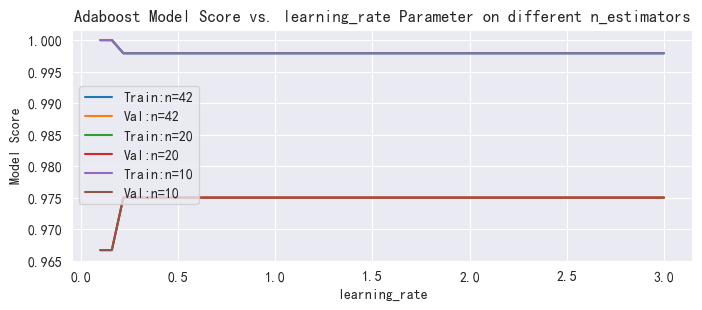

In [97]:
# 绘制C参数与模型得分关系图
plt.figure(figsize=(8, 3))
plt.plot(lr_range, score_train1, label = 'Train:n=42')
plt.plot(lr_range, score_val1, label = 'Val:n=42')
plt.plot(lr_range, score_train2, label = 'Train:n=20')
plt.plot(lr_range, score_val2, label = 'Val:n=20')
plt.plot(lr_range, score_train3, label = 'Train:n=10')
plt.plot(lr_range, score_val3, label = 'Val:n=10')
plt.title('Adaboost Model Score vs. learning_rate Parameter on different n_estimators')
plt.xlabel('learning_rate')
plt.legend()
plt.ylabel('Model Score')
plt.show()

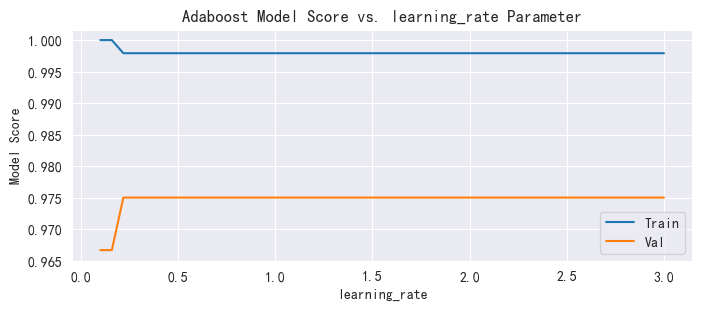

Best Val Score: 0.9750 at learning_rate = 0.22
Train score: 0.9979
Fit time: 0.0065


In [74]:
print(f'Best Val Score: {best_score:.4f} at learning_rate = {best_lr:.2f}')
print(f'Train score: {score_train[score_val.index(best_score)]:.4f}')
print(f'Fit time: {fit_time[score_val.index(best_score)]:.4f}')  # n_estimator = 42

In [75]:
# 最优模型test预测
clf = AdaBoostClassifier(estimator=base_learner, algorithm="SAMME", n_estimators=42, 
                              learning_rate=best_lr, random_state=2024).fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.70      0.88      0.78         8
           2       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.85        30
weighted avg       0.88      0.87      0.87        30



##### 3.4 GBDT

In [82]:
#GBDT分类的实现 初始状态
clf_GBC = GBC(max_features='sqrt', random_state=2024) #实例化
result_GBC = cross_validate(clf_GBC, x_train, y_train, cv=cv, return_train_score=True)
print( f'train_score mean:{result_dis["train_score"].mean():.4f}')
print( f'val_score mean:{result_dis["test_score"].mean():.4f}')  
print( f'fit_time mean:{result_dis["fit_time"].mean():.4f}') 

train_score mean:0.9979
val_score mean:0.9750
fit_time mean:0.0080


In [83]:
#GBDT分类的实现 调整max_features
clf_GBC = GBC(max_features='log2', random_state=2024) #实例化
result_GBC = cross_validate(clf_GBC, x_train, y_train, cv=cv, return_train_score=True)
print( f'train_score mean:{result_dis["train_score"].mean():.4f}')
print( f'val_score mean:{result_dis["test_score"].mean():.4f}')  
print( f'fit_time mean:{result_dis["fit_time"].mean():.4f}') 

train_score mean:0.9979
val_score mean:0.9750
fit_time mean:0.0080


因此在GBDT当中，max_depth的调参方向是放大/加深，以探究模型是否需要更高的单一评估器复杂度。相对的在随机森林当中，max_depth的调参方向是缩小/剪枝，用以缓解过拟合。
n_estimators（整体学习能力）//
learning_rate（整体学习速率）
max_features（随机性）//

In [86]:
clf_GBC = GBC(n_estimators=42, max_features='sqrt', random_state=2024) #实例化
result_GBC = cross_validate(clf_GBC, x_train, y_train, cv=cv, return_train_score=True)
print( f'train_score mean:{result_dis["train_score"].mean():.4f}')
print( f'val_score mean:{result_dis["test_score"].mean():.4f}')  
print( f'fit_time mean:{result_dis["fit_time"].mean():.4f}') 

train_score mean:0.9979
val_score mean:0.9750
fit_time mean:0.0080


In [98]:
#调整lr
lr_range = np.linspace(0.1,3,50)
def GBDT_adjust(n,lr_range):
    score_val = []
    score_train = []
    fit_time = []
    for i in lr_range:
        clf_GBC = GBC(n_estimators=n, learning_rate=i, max_features='sqrt', random_state=2024)
        result_GBC = cross_validate(clf_GBC, x_train, y_train, cv=cv, return_train_score=True)
        score_train.append(result_GBC["train_score"].mean())
        score_val.append(result_GBC["test_score"].mean())
        fit_time.append(result_GBC["fit_time"].mean())
    best_score = max(score_val)
    best_lr = lr_range[score_val.index(best_score)]
    return score_val, score_train, fit_time, best_score, best_lr

In [100]:
# 调整n_estimators
score_val1, score_train1, fit_time1, best_score1, best_lr1 = GBDT_adjust(42,lr_range)
score_val2, score_train2, fit_time2, best_score2, best_lr2 = GBDT_adjust(10,lr_range)
score_val3, score_train3, fit_time3, best_score3, best_lr3 = GBDT_adjust(5,lr_range)

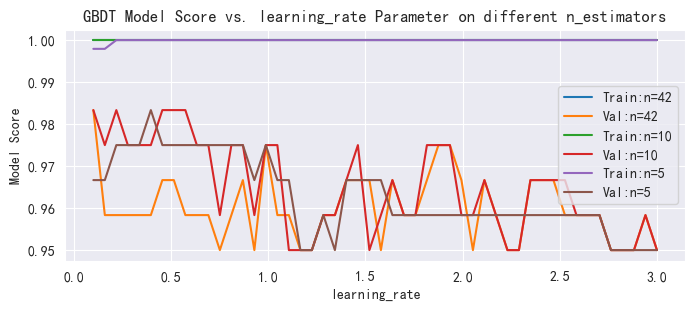

In [101]:
# 绘制参数与模型得分关系图
plt.figure(figsize=(8, 3))
plt.plot(lr_range, score_train1, label = 'Train:n=42')
plt.plot(lr_range, score_val1, label = 'Val:n=42')
plt.plot(lr_range, score_train2, label = 'Train:n=10')
plt.plot(lr_range, score_val2, label = 'Val:n=10')
plt.plot(lr_range, score_train3, label = 'Train:n=5')
plt.plot(lr_range, score_val3, label = 'Val:n=5')
plt.title('GBDT Model Score vs. learning_rate Parameter on different n_estimators')
plt.xlabel('learning_rate')
plt.legend()
plt.ylabel('Model Score')
plt.show()

In [102]:
print(f'Best Val Score: {best_score2:.4f} at learning_rate = {best_lr2:.2f}')
print(f'Train score: {score_train2[score_val2.index(best_score2)]:.4f}')
print(f'Fit time: {fit_time2[score_val2.index(best_score2)]:.4f}')

Best Val Score: 0.9833 at learning_rate = 0.10
Train score: 1.0000
Fit time: 0.0438


In [104]:
lr_range[7]

0.5142857142857142

In [105]:
# 最终选定参数n=10,lr=0.5
clf = GBC(n_estimators=10, learning_rate=0.5, max_features='sqrt', random_state=2024).fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.70      0.88      0.78         8
           2       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.85        30
weighted avg       0.88      0.87      0.87        30

